<a href="https://colab.research.google.com/github/bamboohorseking/INDE577/blob/main/KNN_assignment_ShiyuanWang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


# K Nearest Neighbors
##Definition:
A k-nearest-neighbor is a data classification algorithm that attempts to determine what group a data point is in by looking at the data points around it.\
KNN method is one of the simplest supervised learning model that we can make for doing classifiction or making predicition.\
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.\
K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
<img src="https://test.basel.in/wp-content/uploads/2019/06/KNN-1.jpg" width="800" height="700">

---

---


## Algorithm of KNN 
1.  Select the number K of the neighbors.
2.  Calculate the Euclidean distance of K number of neighbors.
3. Take the K nearest neighbors as per the calculated Euclidean distance.
4. Among these k neighbors, count the number of the data points in each category.
5. Assign the new data points to that category for which the number of the neighbor is maximum.

---

---

## Selection of K value 


*   Divide your data into train and tuning (validation) set. Do not use test set for this purpose. Use the validation set to tune your k and find the one that works for your problem.
*   Another method is to use Schwarz Criterion.
1. The Schwarz Criterion picks k by minimizing : distortion + λDk log N.
2. D = dimension of problem, k = number of clusters, N = no. of data points, λ = parameter to be specified.
3. It is to be noted that, when λ tends to 0; we are not penalizing having a large number of cluster centers.

 A trivial clustering achieves zero distortion by putting a cluster center at every data point. When λ tends to infinity, the penalty of one extra cluster will dominate the distortion and we will have to do with least amount of clusters possible (k = 1)






---

### Advantages:

1.  No Training Period
2.  New data can be added seamlessly which will not impact the accuracy of the algorithm.
3. Easy to implement

### Disadvantages:

1.  Does not work well with large dataset
2.  Does not work well with high dimensions
3. Need feature scaling
4. Sensitive to noisy data, missing values and outliers

---
## Data
In this assignment, we will explore KNN method on adataset named "Red wine". It contains 1599 samples,12 columns.

##Packages
The following packages will be needed to run the code below:
*   matplotlib.pyplot: [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
*   numpy: [documentation](https://numpy.org/devdocs/)
*   pandas: [documentation](https://pandas.pydata.org/docs/)
*   sklearn: [documentation](https://scikit-learn.org/stable/)
*   seaborn: [documentation](https://seaborn.pydata.org/)


---

##Derivation
Inside this KNN model, we need to calculate the distance between the test point and neighbor data points, so we will have: $d(x_i,x_j) = \sqrt{\sum_{k=1}^p(x_ik - x_jk)^2}$.\
And we also need to calculate the classification error rate of our model, so we have: Error rate = $\frac{\# Misclassification }{\# Total} $

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
wine = pd.read_csv('winequality-red.csv',
                 sep=';',
                 error_bad_lines=False,
                 engine='python')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


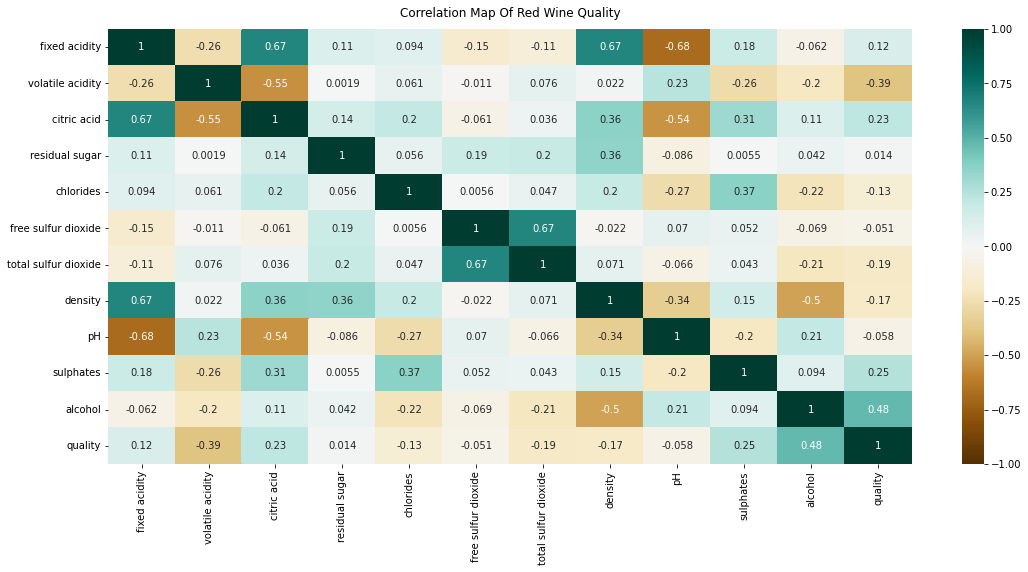

In [4]:
plt.figure(figsize=(18, 8))
sns.heatmap(wine.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation Map Of Red Wine Quality', fontdict={'fontsize':12}, pad=12);

For this assignment, I will use two factors: density and alochol to predict the quality of red wine. Since We can see density and alcohol are related to the quality of red wine and they are not very dependent on each other. 

In [5]:
data = wine[['density', 'alcohol', 'quality']]
data


,density,alcohol,quality
0,0.99780,9.4,5
1,0.99680,9.8,5
2,0.99700,9.8,5
3,0.99800,9.8,6
4,0.99780,9.4,5
...,...,...,...
1594,0.99490,10.5,5
1595,0.99512,11.2,6
1596,0.99574,11.0,6
1597,0.99547,10.2,5


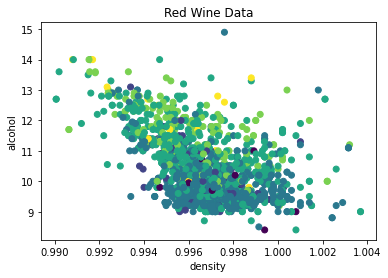

In [6]:
plt.scatter(data['density'], data['alcohol'], c = data['quality'])
plt.xlabel('density')
plt.ylabel('alcohol')
plt.title('Red Wine Data')
plt.show()

In [7]:
number_of_quality = np.unique(data['quality'])
number_of_quality

array([3, 4, 5, 6, 7, 8])

In [8]:
number_of_quality = np.unique(data['quality'])
for i in range(6):
  print(len(data[data['quality'] == number_of_quality[i]]))

10
53
681
638
199
18


In [9]:
data['quality'] = np.where(data['quality'] > 6, 1, 0)
data['quality'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    1382
1     217
Name: quality, dtype: int64

Based on the number of each level of quality, I decide to treat the quality > 6 as high quality wine, and quality <= 6 as low qualitu wine. 

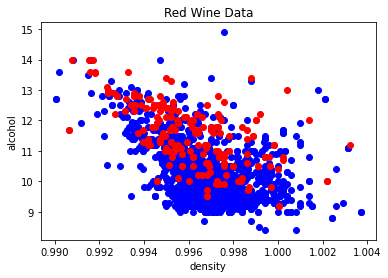

In [ ]:

plot_data_1 = data[data['quality'] == 0]
plt.scatter(plot_data_1['density'], plot_data_1['alcohol'], c = 'b')

plot_data_2 = data[data['quality'] == 1]
plt.scatter(plot_data_2['density'], plot_data_2['alcohol'], c = 'r')

plt.xlabel('density')
plt.ylabel('alcohol')
plt.title('Red Wine Data')
plt.show()

According to the plot above, we can notice that the low quality wine is dominamnt. In this case, I want to figure out if the prediction made by KNN will be influenced by a very dominant class. 

##Splitting data into training set and test set. 

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['quality'], axis = 1).to_numpy()
y = data['quality'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

First, we need to define the k nearest neighbors finder function and the distance function. 

In [ ]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    neighbors = []
    for i, p in enumerate(training_features):
        d = distance(point, p)
        temp_data = [p, training_labels[i], d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

Next, we need to define a function which can help us make prediction based on the K nearest data points. 

In [ ]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

We also need a function that can help us figure out the classifcation error rate. 

In [ ]:
def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for i, point in enumerate(test_features):
        if test_labels[i] != KNN_Predict(point, 
                                               training_features, 
                                               training_labels, 
                                               k):
          error = error + 1
    return error/i

In the begining, I would like to choose K = 5 to build a KNN model. After that I would try to find the optimal K value which can gives us lowest classification error rate. 

In [ ]:
K = 5
classification_error(X_test, y_test, X_train, y_train, 5)

0.13793103448275862

Based on the result, we can know that by K = 5, we have 13.8% misclassification for our model. In the following, I will try to optimize the K value, and I will try to use the least K value to reach the lowest classification error rate. 

In [ ]:
possible_k = [x for x in range(6, 50, 2)]
error_rate = errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


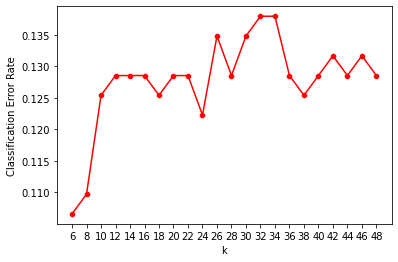

In [ ]:
sns.lineplot(possible_k, error_rate, color = 'red')
sns.scatterplot(possible_k, error_rate, color = 'red')
plt.xlabel('k')
plt.ylabel('Classification Error Rate')
plt.xticks(possible_k)
plt.show()

Unlike what professor showed us during the course, the error rate for my model is getting larger as I increase the K values. I would like to figure out if we can find optimal K value from range 1-10. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


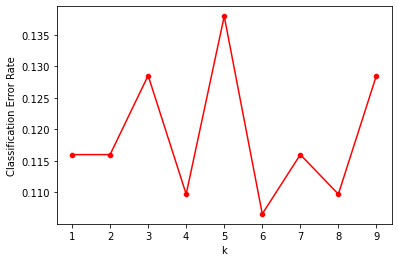

In [ ]:
possible_k = [x for x in range(1, 10, 1)]
error_rate = errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]
sns.lineplot(possible_k, error_rate, color = 'red')
sns.scatterplot(possible_k, error_rate, color = 'red')
plt.xlabel('k')
plt.ylabel('Classification Error Rate')
plt.xticks(possible_k)
plt.show()

From the result above, we can say K = 6 is the best K value for our model for this dataset. When K gets more than 6, the model starts getting overfitting. 

In [ ]:
predicted_labels = [KNN_Predict(point, X_train, 
                                y_train, 
                                6) for point in X_test]

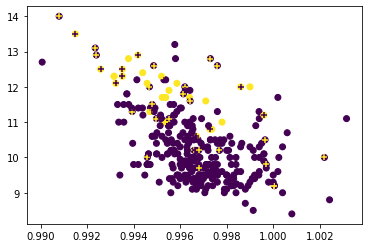

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = predicted_labels)

plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, marker = '+')

After building this KNN model, I am really interested in some methods that can help us improve this KNN model and get lower classification error rate. One thing that come to mind is that the value of alcohol is very large, but the value for density is very small. Therefore, I want to find out if the different scale of values for those 2 features can impact the result of our "optimal model".

In [ ]:
from sklearn import preprocessing
X_new = X
X_new[:,0] = preprocessing.scale(X_new[:,0])
X_new[:,1] = preprocessing.scale(X_new[:,1])


In [ ]:
X_new

array([[ 0.55827446, -0.96024611],
       [ 0.02826077, -0.58477711],
       [ 0.13426351, -0.58477711],
       ...,
       [-0.53355375,  0.54162988],
       [-0.67665745, -0.20930812],
       [-0.66605717,  0.54162988]])

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, stratify = y, test_size = 0.2, random_state = 42)

In [ ]:
classification_error(X_test_new, y_test_new, X_train_new, y_train_new, 6)

0.12539184952978055

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


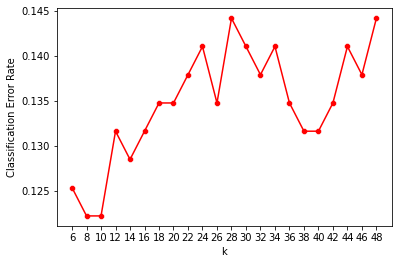

In [ ]:
possible_k = [x for x in range(6, 50, 2)]
error_rate = errors = [classification_error(X_test_new, y_test_new, X_train_new, y_train_new, k) for k in possible_k]
sns.lineplot(possible_k, error_rate, color = 'red')
sns.scatterplot(possible_k, error_rate, color = 'red')
plt.xlabel('k')
plt.ylabel('Classification Error Rate')
plt.xticks(possible_k)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


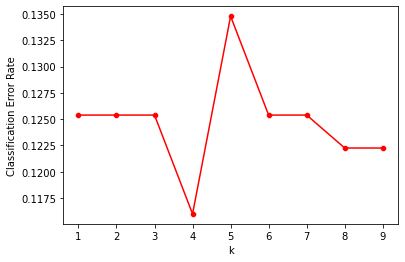

In [ ]:
possible_k = [x for x in range(1, 10, 1)]
error_rate = errors = [classification_error(X_test_new, y_test_new, X_train_new, y_train_new, k) for k in possible_k]
sns.lineplot(possible_k, error_rate, color = 'red')
sns.scatterplot(possible_k, error_rate, color = 'red')
plt.xlabel('k')
plt.ylabel('Classification Error Rate')
plt.xticks(possible_k)
plt.show()

In [ ]:
classification_error(X_test_new, y_test_new, X_train_new, y_train_new, 4)

0.11598746081504702

In [ ]:
table = [["Before scaling K = 6", classification_error(X_test, y_test, X_train, y_train, 6)], 
        ["After scaling K = 6", classification_error(X_test_new, y_test_new, X_train_new, y_train_new, 6)],
         ["After scaling K = 4", classification_error(X_test_new, y_test_new, X_train_new, y_train_new, 4)]]
col_names = ["Run", "Error Rate"]
print(tabulate(table, headers=col_names))

Run                     Error Rate
--------------------  ------------
Before scaling K = 6      0.106583
After scaling K = 6       0.125392
After scaling K = 4       0.115987


Scaling data does not help us improve the model based on the result we have. From this assignment, I am able to perform the basic KNN algorithm and I can code the whole model from scratch. 